In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## ArXiv (no categories)

In [ ]:
## Query Categories for All Papers
# i = 5
# inp_path = '../arxiv-dataset/train' + str(i) +  '.txt'
# with open(inp_path, "r") as f:
#     lines = f.readlines()
# print(len(lines))

# def query_domain(arxiv_id):
#     # arxiv_id = "1810.04805"
#     url = f'http://export.arxiv.org/api/query?id_list={arxiv_id}'
#     response = requests.get(url)
#     root = ET.fromstring(response.text)
#     categories = [cat.attrib['term'] for cat in root.iter('{http://www.w3.org/2005/Atom}category')]
#     return categories
# only_cat = []
# for line in lines[2002:]:
#     paper = json.loads(line)
#     time.sleep(0.01)
#     paper['categories'] = query_domain(paper["article_id"])
#     only_cat.append(paper['categories'])
# ids_for_cats = { 'cs': [], 'eco': [], 'eess': [], 'math': [], 'physics': [], 'q-bio': [], 'q-fin': [], 'stat': []}
# for i, cat in enumerate(only_cat):
#     if ' '.join(cat).startswith('cs'):
#         ids_for_cats['cs'].append(i)
#     if ' '.join(cat).startswith('eco'):
#         ids_for_cats['eco'].append(i)
#     if ' '.join(cat).startswith('eess'):
#         ids_for_cats['eess'].append(i)
#     if ' '.join(cat).startswith('math'):
#         ids_for_cats['math'].append(i)
#     if ' '.join(cat).startswith('physics'):
#         ids_for_cats['physics'].append(i)
#     if ' '.join(cat).startswith('q-bio'):
#         ids_for_cats['q-bio'].append(i)
#     if ' '.join(cat).startswith('q-fin'):
#         ids_for_cats['q-fin'].append(i)
#     if ' '.join(cat).startswith('stat'):
#         ids_for_cats['stat'].append(i)

# with open('ids_for_cats.pickle', 'rb') as handle:
#     ids_for_cats2 = pickle.load(handle)
# length1 = len([ele for lst in ids_for_cats2.values() for ele in lst ])
# length2 = len([ele for lst in ids_for_cats.values() for ele in lst ])
# for k in  ids_for_cats2:
#     ids_for_cats2[k] = ids_for_cats2[k] + ids_for_cats[k]
# length3 = len([ele for lst in ids_for_cats2.values() for ele in lst ])
# assert length3 == length1 + length2

# with open('ids_for_cats.pickle', 'wb') as handle:
#     pickle.dump(ids_for_cats2, handle, protocol=pickle.HIGHEST_PROTOCOL)

# print(len(only_cat))

# total = 0
# for domain, idx in ids_for_cats2.items():
#     total += len(idx)
#     print(domain, len(idx))
# print(total)

## Cornell Arxiv

In [1]:
import json


In [37]:
# read data/arxiv-metadata-oai-snapshot.json
arxiv_cscl = []
i = 0
with open('data/arxiv-metadata-oai-snapshot.json', 'r') as f:
    for line in f:
        paper = json.loads(line)
        if 'cs.CL' in paper['categories']:
            arxiv_cscl.append( [paper['id'],  paper['categories'], paper['journal-ref'], paper['title'], paper['abstract']] )
     

# save to data/arxiv_cscl.json
with open('data/arxiv_cscl.json', 'w') as f: 
    json.dump(arxiv_cscl, f)



In [38]:
print(len(arxiv_cscl)) # 44408

44408


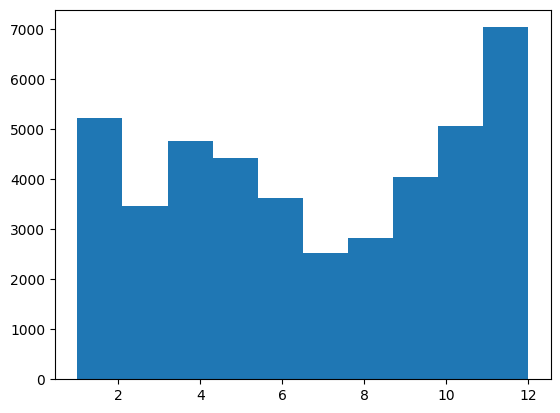

The number of papers in 12-12:  3266


In [39]:
def select_papers(cornell_papers, min_year=12, max_year=12):
    # show years distribution
    years = [paper[0][2:4] for paper in cornell_papers]
    years_int = []
    for year in years:
        try:
            years_int.append(int(year))
        except:
            pass

    plt.hist(years_int, )
    plt.show()

    # select papers
    selected_i = []
    for i, year in enumerate(years):
        try:
            if int(year) >= min_year and int(year) <= max_year:
                selected_i.append(i)
        except:
            pass
    select_papers = [cornell_papers[i] for i in selected_i]
    print(f'The number of papers in {min_year}-{max_year}: ', len(select_papers)) 
    return select_papers

# select papers in 2012-2012
arxiv_cscl_12 = select_papers(arxiv_cscl, 12, 12)

In [64]:
def sample_papers(papers, N = 100):
    # randomly generate N papers
    np.random.seed(0)
    selected_ids = np.random.choice(len(papers), N, replace=False)
    # selected_ids = sorted(selected_ids)
    selected_papers = [papers[i] for i in selected_ids]
    # check titles
    titles = [p[3] for p in selected_papers]
    # abstracts = [p[4] for p in selected_papers]
    # for i, (title, abs) in enumerate(zip(titles, abstracts)):
    #     print(i, title, '\n', abs)
    # for i, title in enumerate(titles):
    #     print(i, title,)
    return selected_papers

# sample 100 papers
arxiv_cscl_12_100 = sample_papers(arxiv_cscl_12, 100)

# a list of dictionary to csv
import pandas as pd
df = pd.DataFrame(arxiv_cscl_12_100, columns=['id', 'categories', 'journal-ref', 'title', 'abstract'])



In [69]:
# sentence segmentation
import spacy
nlp = spacy.load("en_core_web_sm")
segmented_sents = []
for abstract in df['abstract']:
    doc = nlp(abstract)
    segmented_sents.append(' '.join([f'<{i}> '+sent.text.strip()+ f' </{i}>' for i, sent in enumerate(doc.sents)]))
df['segmented_sents'] = segmented_sents


    

In [73]:
# save to csv
df[['title', 'abstract', 'segmented_sents']].to_csv('data/arxiv_cscl_12_100.csv', index=False)